In [2]:
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

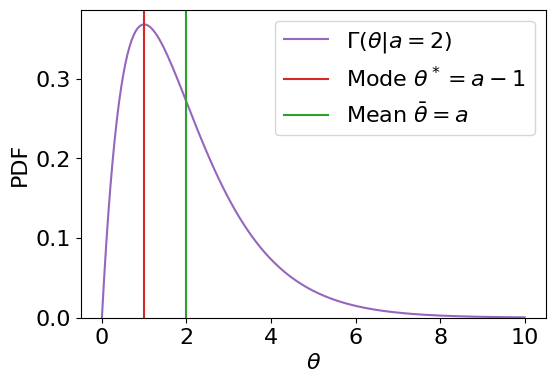

In [3]:
# Poisson
# a - 1 = k
a = 2

# Generate a large sample of random values from the Gamma distribution
theta = np.linspace(0, 10, 200)
gamma = sp.stats.gamma(a).pdf(theta)

# Plot the histogram of the samples
plt.figure(figsize=(6, 4))
plt.plot(theta, gamma, color='tab:purple', linewidth=1.5, label=r'$\Gamma(\theta|a={})$'.format(a))

# Plot the mean as a vertical line
plt.axvline(x=a-1, color='tab:red', label=r'Mode $\theta^* = a-1$')
plt.axvline(x=a, color='tab:green', label=r'Mean $\bar{\theta} = a$')

plt.ylim(0)
plt.xlabel(r'$\theta$')
plt.ylabel('PDF')
plt.legend()

# Show the plot
file='plots/map_vs_mean.pdf'
plt.savefig(file, bbox_inches='tight')
plt.show()

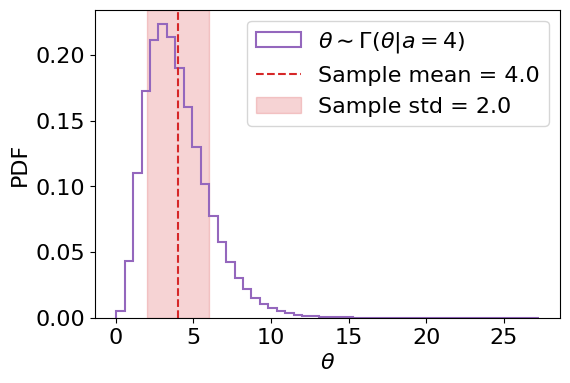

In [4]:
# Poisson
# a - 1 = k
a = 4

# Generate a large sample of random values from the Gamma distribution
sample_size = int(1e8)
samples = sp.stats.gamma.rvs(a, size=sample_size)

# Calculate the sample mean and variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples)
sample_std_dev = np.sqrt(sample_variance)

# Plot the histogram of the samples
plt.figure(figsize=(6, 4))
plt.hist(samples, bins=50, color='tab:purple', linewidth=1.5, histtype='step', density=True, label=r'$\theta\sim\Gamma(\theta|a={})$'.format(a))

# Plot the mean as a vertical line
plt.axvline(x=sample_mean, color='tab:red', linestyle='--', label=f'Sample mean = {sample_mean:.1f}')

# Fill the area around the mean representing one standard deviation (variance)
plt.axvspan(
    sample_mean - sample_std_dev,
    sample_mean + sample_std_dev,
    color='tab:red', alpha=0.2, label=f'Sample std = {sample_std_dev:.1f}')

# Annotate the sample mean and variance on the plot
# plt.text(sample_mean + 0.5, 0.05, f'Mean = {sample_mean:.1f}\nVariance = {sample_variance:.1f}',
        #  color='tab:red')

# Labels and title
plt.xlabel(r'$\theta$')
plt.ylabel('PDF')
plt.legend()

# Show the plot
file='plots/gamma.pdf'
plt.savefig(file, bbox_inches='tight')
plt.show()

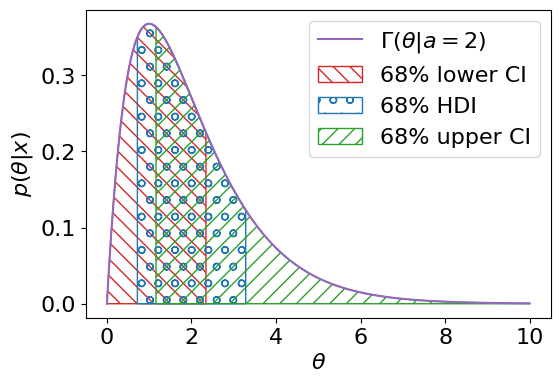

In [58]:
a=2

# Create the Gamma distribution
gamma_dist = sp.stats.gamma(a)

# Plot the Gamma distribution and highlight the intervals
x = np.linspace(0, 10, 1000)
y = gamma_dist.pdf(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$\Gamma(\theta|a={})$'.format(a), color='tab:purple')
plt.fill_between(x, y, where=((x >= 0) & (x <= gamma_dist.ppf(0.68))), label='68% lower CI', color='tab:red', hatch='\\\\',  facecolor="none")
plt.fill_between(x, y, where=((x >= gamma_dist.ppf(0.16)) & (x <= gamma_dist.ppf(0.84))), label='68% HDI', color='tab:blue',  hatch='o', facecolor="none")
plt.fill_between(x, y, where=((x >= gamma_dist.ppf(0.32)) & (x <= 10)), label='68% upper CI', color='tab:green', hatch='//',  facecolor="none")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|x)$')
plt.legend()
file='plots/intervals.pdf'
plt.savefig(file, bbox_inches='tight')
plt.show()
